✅
Duplicates

In [1]:
import pandas as pd
from sqlalchemy.engine import row

df = pd.read_csv('../train_dataset_M1_with_id.csv')

num_duplicates= df.duplicated().sum()

print(f"Number of fully duplicate rows: {num_duplicates}")

#Duplicate ids 
num_duplicate_ids = df.duplicated(subset=["id"]).sum()

print(f"Number of fully duplicate rows: {num_duplicate_ids}")


from thefuzz import fuzz
from tqdm import tqdm

rows_as_text = df.head(10000).astype(str).agg("".join, axis=1)

threshold = 90
similar_pairs = []

for i in tqdm(range(len(rows_as_text)), desc="Comapring rows"):
    for j in range(i+1, len(rows_as_text)):
        sim = fuzz.ratio(rows_as_text[i], rows_as_text[j])
        if sim >= threshold:
            similar_pairs.append((i,j,sim))

print(f"{len(similar_pairs)} pairs of rows are ≥{threshold}% similar")


Number of fully duplicate rows: 0
Number of fully duplicate rows: 0


Comapring rows: 100%|██████████| 10000/10000 [14:20<00:00, 11.62it/s]

0 pairs of rows are ≥90% similar


✅Missing values

In [2]:
df = pd.read_csv('../train_dataset_M1_with_id.csv')
print(df.head())
print(df.info())
print(df.describe())

print("Missing values per column:")
print(df.isnull().sum())

missing_percent = df.isnull().sum() / len(df) * 100
print("Percentage of missing values per column:")   
print(missing_percent)


   id   Age  Gender  Reviews_Read    Price  Discount  Category  Items_In_Cart  \
0   1   NaN     1.0           3.0  592.975      22.0       1.0            6.0   
1   2  25.0     1.0           1.0  511.279      12.0       0.0            3.0   
2   3  22.0     0.0           3.0  218.360       2.0       1.0            4.0   
3   4  24.0     0.0           3.0  313.781       1.0       3.0            0.0   
4   5  35.0     1.0           1.0  495.088      13.0       0.0            2.0   

  Time_of_Day  Email_Interaction  ... Referral_Source  \
0   afterno0n                0.0  ...             NaN   
1     morning                1.0  ...    Social_media   
2     evening                1.0  ...    Social_media   
3     evening                1.0  ...    Social_media   
4     evening                0.0  ...    Social_media   

  Socioeconomic_Status_Score Engagement_Score  AB_Bucket  Price_Sine  \
0                       7.26         1.856520        3.0    0.999047   
1                       8.

✅Heatmaps

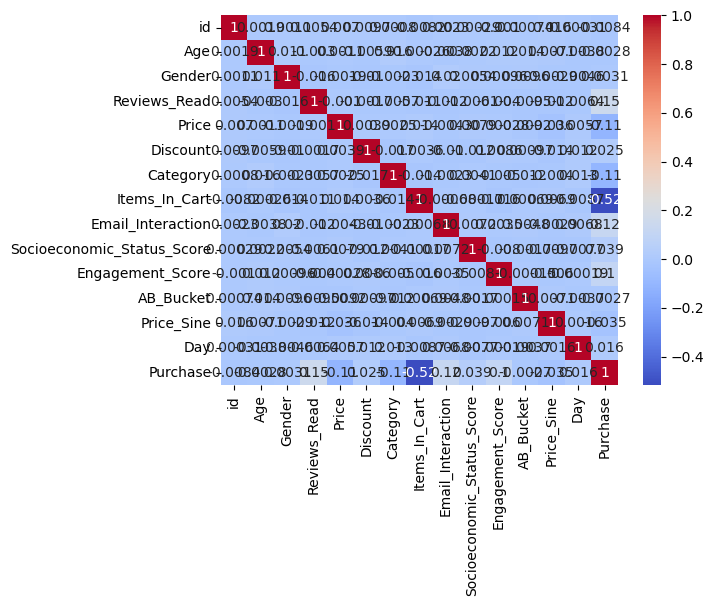

<class 'pandas.core.frame.DataFrame'>


In [3]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

df = pd.read_csv('../train_dataset_M1_with_id.csv')


corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

subset = df[["Price", "Discount", "Purchase"]]
print(type(subset))


✅Linear regression and random forest

In [4]:

from sklearn.linear_model import LinearRegression
import pandas as pd
df = pd.read_csv('../train_dataset_M1_with_id.csv')
X = df[['Price','Discount','Items_In_Cart']].fillna(0)
y = df['Purchase']

model = LinearRegression()
model.fit(X, y)
print(model.score(X,y))
print(dict(zip(X.columns, model.coef_)))


from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from tqdm import tqdm

X = pd.get_dummies(df.drop(columns=['Purchase'])).fillna(0)
y = df['Purchase']

# Create RF with warm_start
rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)

n_trees = 100
importances_list = []

with tqdm(total=n_trees, desc="Training Random Forest") as pbar:
    for i in range(1, n_trees + 1):
        rf.n_estimators = i
        rf.fit(X, y)
        pbar.update(1)

# Feature importances after full fit
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(10))


0.26649132707796774
{'Price': np.float64(-6.20353653611725e-05), 'Discount': np.float64(0.00089750161668871), 'Items_In_Cart': np.float64(-0.08462877272120042)}


Training Random Forest: 100%|██████████| 100/100 [05:10<00:00,  3.10s/it]

Items_In_Cart                 0.153571
Price                         0.051251
Engagement_Score              0.050651
Price_Sine                    0.037701
Socioeconomic_Status_Score    0.037216
id                            0.037123
Day                           0.035446
Discount                      0.035120
Reviews_Read                  0.032945
Age                           0.031692
dtype: float64


✅Visualize distributions (numeric features vs target):

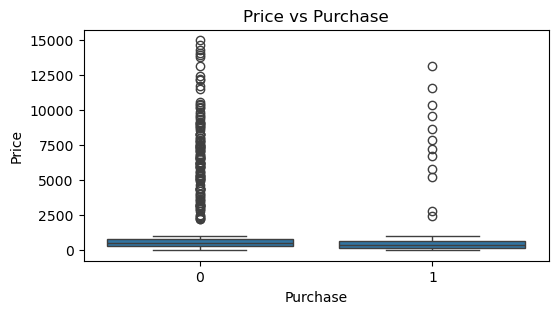

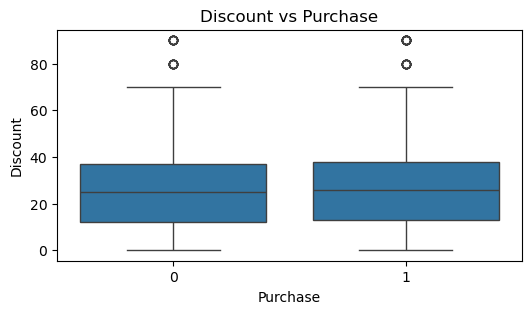

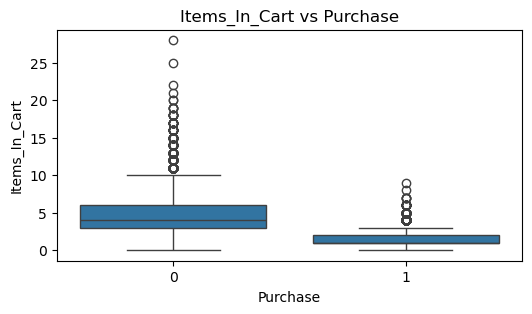

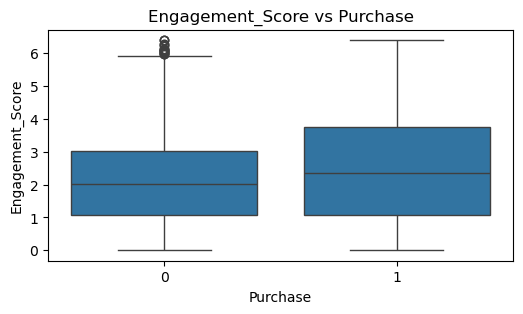

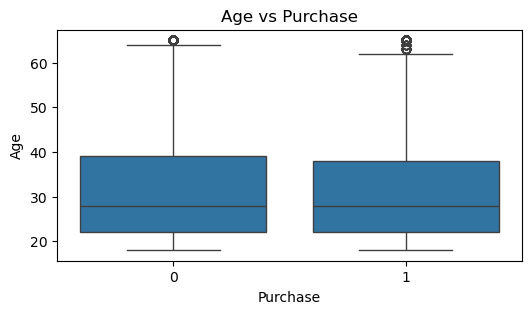

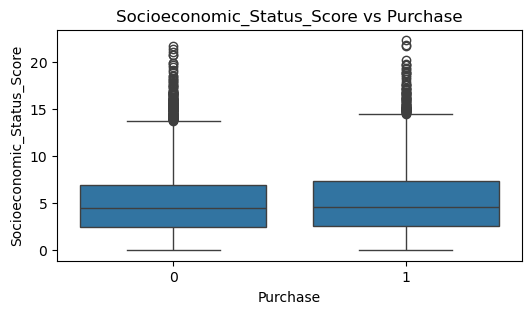

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Price', 'Discount', 'Items_In_Cart', 'Engagement_Score', 'Age', 'Socioeconomic_Status_Score']
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='Purchase', y=col, data=df)
    plt.title(f'{col} vs Purchase')
    plt.show()

✅Categorical features vs Purchase:


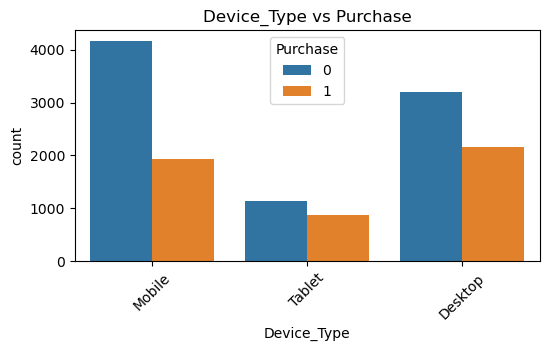

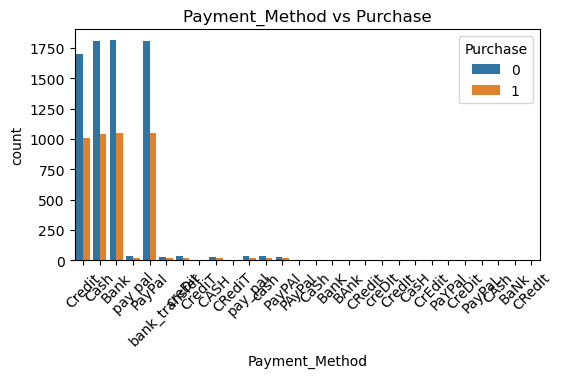

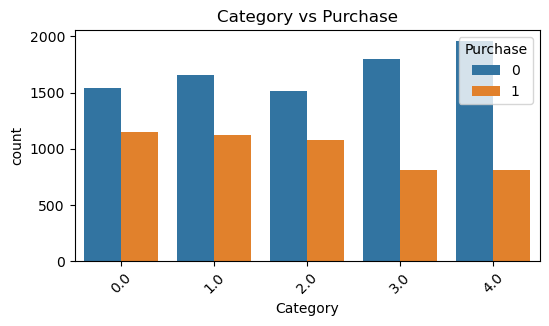

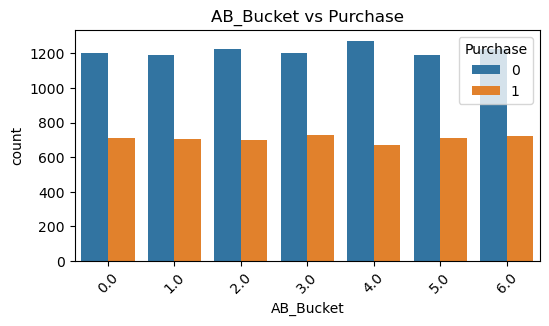

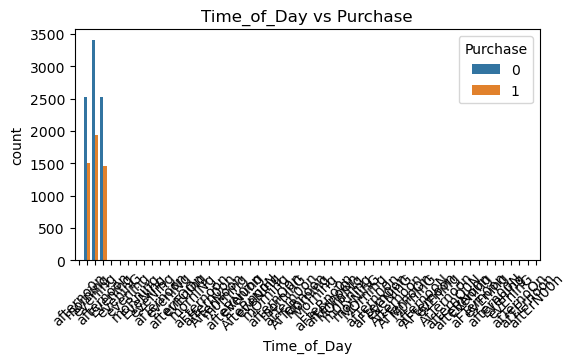

In [6]:
categorical_cols = ['Device_Type','Payment_Method','Category','AB_Bucket','Time_of_Day']
for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='Purchase', data=df)
    plt.title(f'{col} vs Purchase')
    plt.xticks(rotation=45)
    plt.show()

NEED TO NORMALIZE ALL OF THE TEXT DATA

✅Unique Values

In [32]:
for col in df.columns:
    print(f"Unique values for '{col}':")
    print(df[col].unique())
    print("-" * 50)


Unique values for 'id':
[    1     2     3 ... 13733 13734 13735]
--------------------------------------------------
Unique values for 'Age':
[nan 25. 22. 24. 35. 28. 19. 18. 36. 27. 65. 21. 37. 44. 23. 40. 20. 39.
 33. 41. 38. 55. 53. 32. 26. 46. 47. 45. 30. 51. 60. 64. 34. 31. 50. 49.
 29. 42. 54. 56. 57. 52. 59. 48. 63. 43. 62. 61. 58.]
--------------------------------------------------
Unique values for 'Gender':
[ 1.  0. nan]
--------------------------------------------------
Unique values for 'Reviews_Read':
[ 3.  1.  2.  4.  5.  6.  0.  7. nan  9.  8. 10. 11.]
--------------------------------------------------
Unique values for 'Price':
[592.975 511.279 218.36  ... 763.285 276.455 909.369]
--------------------------------------------------
Unique values for 'Discount':
[22. 12.  2.  1. 13. 21. 41. 14. 20.  4. 27. 33. 46. 35.  7. 37. 29. 50.
 38. 31. 15.  3.  8. 47. 18. 16. 48. 40. 10. 44. 26. 34.  5. 39. 32. 23.
  9.  0. 36. 19. 25. 28. 30. 11. 42. 17. 43. 49. 24. 45.  6. nan 90

In [33]:
# Select only object / categorical columns
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"Unique values for '{col}':")
    print(df[col].dropna().unique())  # drop NaN for cleaner output
    print("-" * 50)


Unique values for 'Time_of_Day':
['afterno0n' 'morning' 'evening' 'afternoon' 'aftern0on' 'm0rning'
 'aftern00n']
--------------------------------------------------
Unique values for 'Device_Type':
['mobile' 'tablet' 'desktop']
--------------------------------------------------
Unique values for 'Payment_Method':
['credit' 'cash' 'bank' 'pay pal' 'paypal' 'bank_transfer' 'pay_pal']
--------------------------------------------------
Unique values for 'Referral_Source':
['social_media' 'direct' 'search_engine' 'ads' 'email' 's0cial_media'
 'search-engine']
--------------------------------------------------
Unique values for 'PM_RS_Combo':
['credit:social_media' 'cash:social_media' 'bank:social_media'
 'bank:direct' 'bank:search_engine' 'paypal:search_engine' 'cash:ads'
 'cash:direct' 'credit:search_engine' 'paypal:email' 'credit:ads'
 'bank:ads' 'bank:email' 'paypal:direct' 'cash:search_engine'
 'credit:direct' 'paypal:social_media' 'cash:email' 'credit:email'
 'paypal:ads']
------------

Normalizing categorical variables

Will be part of the pipeline ------------------------------------------------------------------------------

In [35]:
import numpy as np
import re

def clean_categorical(df):
    cat_cols = df.select_dtypes(include='object').columns
    
    for col in cat_cols:
        # Convert everything to string
        df[col] = df[col].astype(str).str.lower().str.strip()
        # Convert 'nan' strings to actual np.nan
        df[col] = df[col].replace('nan', np.nan)

        col_lower = col.lower()  # lowercase column name for comparison

        # Normalize Time_of_Day using regex with 0->o tolerance
        if col_lower == 'time_of_day':
            df[col] = df[col].replace({
                r'^m[0o].*rning$': 'morning',
                r'^aftern?[0o].*n$': 'afternoon',
                r'^even.*g$': 'evening',
            }, regex=True)

        # Normalize Payment_Method
        elif col_lower == 'payment_method':
            df[col] = df[col].replace({
                r'^cred.*$': 'credit',
                r'^cash$': 'cash',
                r'^pay[\s_]?pal$': 'paypal',
                r'^bank.*$': 'bank',
            }, regex=True)

        # Normalize Referral_Source
        elif col_lower == 'referral_source':
            df[col] = df[col].replace({
                r'^s[0o].*cial.*media$': 'social_media',
                r'^search.*engine$': 'search_engine',
                r'^ads$': 'ads',
                r'^email$': 'email',
                r'^direct$': 'direct',
            }, regex=True)

    return df

# Apply
df = clean_categorical(df)

# Verify
for col in ['Time_of_Day','Payment_Method','Referral_Source']:
    print(f"Unique values for '{col}': {df[col].dropna().unique()}")


Unique values for 'Time_of_Day': ['afternoon' 'morning' 'evening']
Unique values for 'Payment_Method': ['credit' 'cash' 'bank' 'paypal']
Unique values for 'Referral_Source': ['social_media' 'direct' 'search_engine' 'ads' 'email']


Will be part of the pipeline ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

✅Just check if the cleaning worked my be good to implement in the pipeline somehow

In [36]:
def show_rows_with_value(df, column, value):
    """
    Display all rows where the specified column contains the given value (case-insensitive).
    
    Args:
        df (pd.DataFrame): your DataFrame
        column (str): column to search in
        value (str): value or substring to look for
    """
    # Convert both column and search value to string and lowercase
    mask = df[column].astype(str).str.lower().str.contains(value.lower())
    
    # Return filtered rows
    return df[mask]

# Example usage:
rows = show_rows_with_value(df, 'Time_of_Day', 'aftern0on')
print(rows)


Empty DataFrame
Columns: [id, Age, Gender, Reviews_Read, Price, Discount, Category, Items_In_Cart, Time_of_Day, Email_Interaction, Device_Type, Payment_Method, Referral_Source, Socioeconomic_Status_Score, Engagement_Score, AB_Bucket, Price_Sine, PM_RS_Combo, Session_ID, Day, Campaign_Period, Purchase]
Index: []

[0 rows x 22 columns]


Optional derived features


In [ ]:
# Interaction terms
X['Price_x_Discount'] = X['Price'] * X['Discount']
X['Items_x_Engagement'] = X['Items_In_Cart'] * X['Engagement_Score']

# Campaign flag (if you want temporal patterns)
X['Campaign_Period'] = df['Campaign_Period'].apply(lambda x: 1 if x > 0 else 0)


✅Data Balance

In [39]:
# Target variable distribution
print("Purchase value counts:")
print(df['Purchase'].value_counts())
print("\nPurchase proportions:")
print(df['Purchase'].value_counts(normalize=True))

# Check balance across important categorical features
categorical_features = ['Time_of_Day', 'Device_Type', 'Payment_Method', 'Referral_Source', 'Category', 'AB_Bucket', 'Campaign_Period']

for col in categorical_features:
    print(f"\nDistribution for {col}:")
    print(df[col].value_counts(dropna=False))  # dropna=False shows missing values too

for col in categorical_features:
    rates = df.groupby(col)['Purchase'].mean().sort_values(ascending=False)
    print(f"\nPurchase rate by {col}:")
    print(rates)



Purchase value counts:
Purchase
0    8679
1    5056
Name: count, dtype: int64

Purchase proportions:
Purchase
0    0.631889
1    0.368111
Name: proportion, dtype: float64

Distribution for Time_of_Day:
Time_of_Day
evening      5368
morning      4059
afternoon    4029
NaN           279
Name: count, dtype: int64

Distribution for Device_Type:
Device_Type
mobile     6090
desktop    5362
tablet     2005
NaN         278
Name: count, dtype: int64

Distribution for Payment_Method:
Payment_Method
paypal    3015
cash      2959
bank      2926
credit    2783
NaN       2052
Name: count, dtype: int64

Distribution for Referral_Source:
Referral_Source
search_engine    2377
direct           2360
ads              2333
social_media     2323
email            2321
NaN              2021
Name: count, dtype: int64

Distribution for Category:
Category
1.0    2778
4.0    2771
0.0    2690
3.0    2612
2.0    2597
NaN     287
Name: count, dtype: int64

Distribution for AB_Bucket:
AB_Bucket
6.0    1947
4.0    194

Imputation of missing values NON categorical

In [56]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

def knn_impute_numeric(df, n_neighbors=5):
    """
    Impute missing values only for numeric columns using KNN.
    Categorical columns are left unchanged.
    """
    
    df = df.copy()
    
    # Identify numeric and non-numeric columns
    num_cols = df.select_dtypes(include=[np.number]).columns
    non_num_cols = df.select_dtypes(exclude=[np.number]).columns
    
    # Keep numeric part for imputation
    df_num = df[num_cols]
    
    # Apply KNN imputer
    imputer = KNNImputer(n_neighbors=n_neighbors, weights='distance')
    df_num_imputed = pd.DataFrame(imputer.fit_transform(df_num), columns=num_cols, index=df.index)
    
    # Combine numeric (imputed) and non-numeric (original) data back together
    df_imputed = pd.concat([df_num_imputed, df[non_num_cols]], axis=1)
    
    return df_imputed

# Usage
df_imputed = knn_impute_numeric(df, n_neighbors=5)


✅Check the result of imputation on numerical values

In [58]:
import pandas as pd
import numpy as np

# --- 1️⃣ Target variable distribution (still useful)
print("Purchase value counts:")
print(df_imputed['Purchase'].value_counts())
print("\nPurchase proportions:")
print(df_imputed['Purchase'].value_counts(normalize=True))

# --- 2️⃣ Identify numerical columns ---
num_cols = df_imputed.select_dtypes(include=[np.number]).columns.tolist()

# --- 3️⃣ Basic summary stats for numeric columns ---
print("\n📊 Summary statistics for numeric columns after KNN imputation:")
print(df_imputed[num_cols].describe().T[['mean', 'std', 'min', 'max']])

# --- 4️⃣ Check if any NaNs remain ---
missing = df_imputed[num_cols].isna().sum()
print("\n🚨 Missing values remaining per numeric column:")
print(missing[missing > 0] if missing.sum() > 0 else "✅ No missing values left!")

# --- 5️⃣ Optional: Compare distributions before and after imputation (if original df exists)
try:
    num_cols_orig = df.select_dtypes(include=[np.number]).columns
    comparison = pd.DataFrame({
        'mean_before': df[num_cols_orig].mean(),
        'mean_after': df_imputed[num_cols_orig].mean(),
        'std_before': df[num_cols_orig].std(),
        'std_after': df_imputed[num_cols_orig].std()
    })
    print("\n📈 Mean and Std before vs after imputation:")
    print(comparison)
except Exception as e:
    print("\n(⚠️ Skipping before/after comparison – original df not available or mismatched columns.)")


Purchase value counts:
Purchase
0.0    8679
1.0    5056
Name: count, dtype: int64

Purchase proportions:
Purchase
0.0    0.631889
1.0    0.368111
Name: proportion, dtype: float64

📊 Summary statistics for numeric columns after KNN imputation:
                                   mean          std     min           max
id                          6868.000000  3965.097309   1.000  13735.000000
Age                           31.917986    12.119010  18.000     65.000000
Gender                         0.494008     0.496133   0.000      1.000000
Reviews_Read                   2.985791     1.709586   0.000     11.000000
Price                        560.792965   748.549413   5.127  14988.319963
Discount                      25.147056    14.825343   0.000     90.000000
Category                       1.999886     1.411372   0.000      4.000000
Items_In_Cart                  3.517858     2.841848   0.000     28.000000
Time_of_Day                   46.723150     7.940251   0.000     56.000000
Email_I

For categorical columns, change Nan to np.nan not string altough i made the change to clean. Then encode and use KNN imputation. 

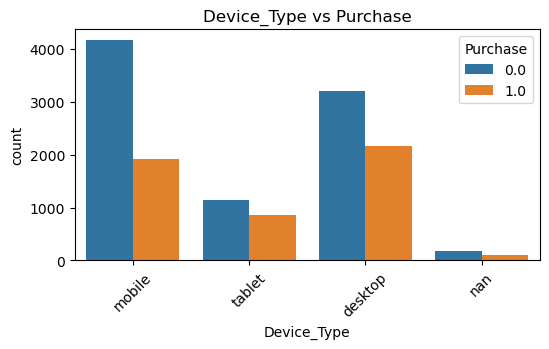

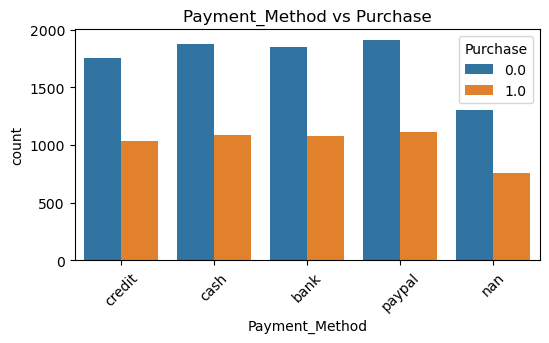

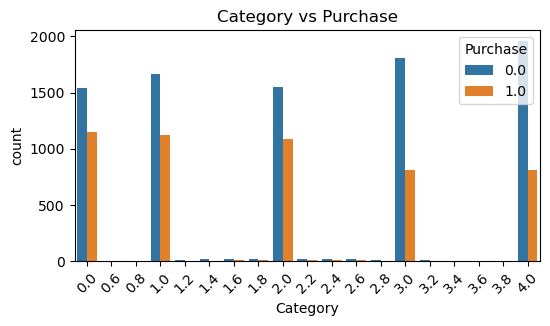

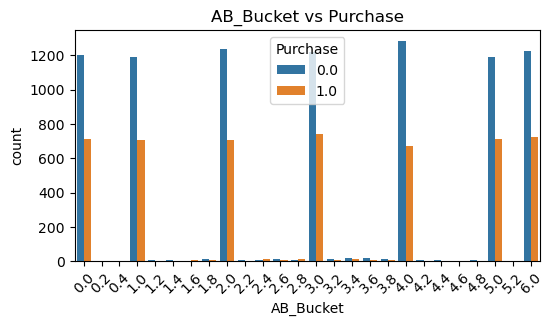

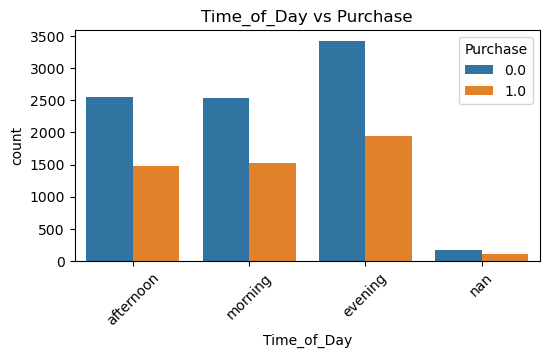

In [47]:
categorical_cols = ['Device_Type','Payment_Method','Category','AB_Bucket','Time_of_Day']
for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='Purchase', data=df_imputed)
    plt.title(f'{col} vs Purchase')
    plt.xticks(rotation=45)
    plt.show()